Epoch 1/10
188/188 [==============================] - 28s 135ms/step - loss: 0.6861 - accuracy: 0.5928
Epoch 2/10
188/188 [==============================] - 26s 136ms/step - loss: 0.6585 - accuracy: 0.6342
Epoch 3/10
188/188 [==============================] - 25s 131ms/step - loss: 0.6630 - accuracy: 0.6515
Epoch 4/10
188/188 [==============================] - 26s 136ms/step - loss: 0.5691 - accuracy: 0.7063
Epoch 5/10
188/188 [==============================] - 25s 130ms/step - loss: 0.4829 - accuracy: 0.7517
Epoch 6/10
188/188 [==============================] - 26s 139ms/step - loss: 0.4081 - accuracy: 0.8278
Epoch 7/10
188/188 [==============================] - 24s 129ms/step - loss: 0.3057 - accuracy: 0.8571
Epoch 8/10
188/188 [==============================] - 27s 143ms/step - loss: 0.1773 - accuracy: 0.9266
Epoch 9/10
188/188 [==============================] - 24s 128ms/step - loss: 0.1138 - accuracy: 0.9533
Epoch 10/10
6/6 [==============================] - 3s 389ms/step - loss: 

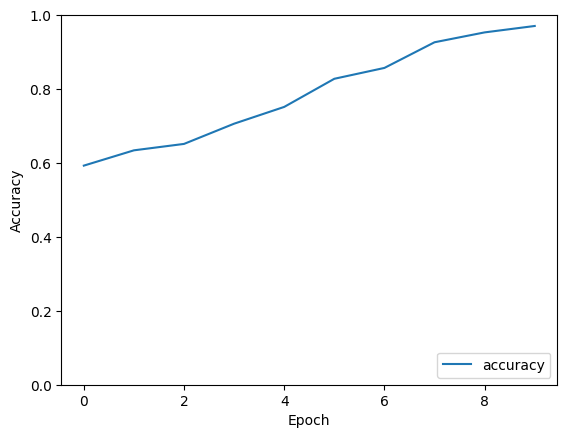

Epoch 1/10
188/188 [==============================] - 27s 134ms/step - loss: 0.6958 - accuracy: 0.6128
Epoch 2/10
188/188 [==============================] - 26s 136ms/step - loss: 0.6676 - accuracy: 0.6235
Epoch 3/10
188/188 [==============================] - 25s 130ms/step - loss: 0.6242 - accuracy: 0.6662
Epoch 4/10
188/188 [==============================] - 26s 139ms/step - loss: 0.5421 - accuracy: 0.7170
Epoch 5/10
188/188 [==============================] - 26s 140ms/step - loss: 0.4872 - accuracy: 0.7623
Epoch 6/10
188/188 [==============================] - 26s 138ms/step - loss: 0.3478 - accuracy: 0.8385
Epoch 7/10
188/188 [==============================] - 24s 126ms/step - loss: 0.2527 - accuracy: 0.8785
Epoch 8/10
188/188 [==============================] - 26s 137ms/step - loss: 0.1693 - accuracy: 0.9226
Epoch 9/10
188/188 [==============================] - 24s 127ms/step - loss: 0.0949 - accuracy: 0.9626
Epoch 10/10
6/6 [==============================] - 2s 233ms/step - loss: 

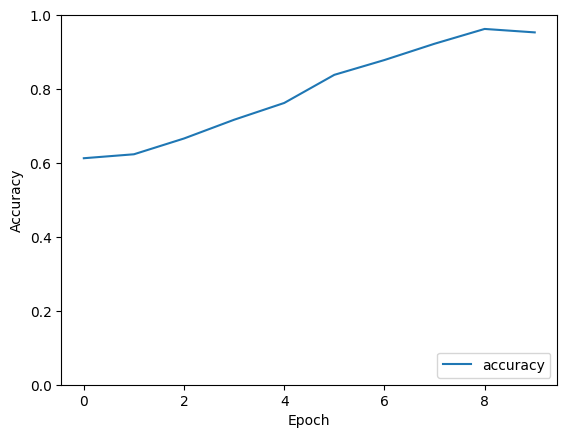

In [ ]:
#before
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score



no_images_file_path = '/content/drive/MyDrive/0'
yes_images_file_path = '/content/drive/MyDrive/1'

images_0 = os.listdir(no_images_file_path)
images_1 = os.listdir(yes_images_file_path)


def load_and_preprocess_data(file_path, label):
    images = []
    labels = []

    for i in os.listdir(file_path):
        img_path = os.path.join(file_path, i)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(label)

    return images, labels

# Load and preprocess data
yes_images, yes_labels = load_and_preprocess_data(yes_images_file_path, 1)
no_images, no_labels = load_and_preprocess_data(no_images_file_path, 0)

# Combine the datasets
all_images = yes_images + no_images
all_labels = yes_labels + no_labels

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( all_images, all_labels, test_size=0.2 )

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to have a single channel (grayscale)
X_train = X_train.reshape((-1, 128, 128, 1))
X_test = X_test.reshape((-1, 128, 128, 1))

# Build the CNN model
model = models.Sequential()
#creates a sequential model (linear stack of layers --one io)

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
# 2d convolutional layer (conv layer is for feature extraction)
# total kernels = 32 (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#a 2x2 pooling layer for reducing size of image dimensions

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#2nd 2d convulutional layer
#64 kernels/filters (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#2x2 pooling window

#****
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#2nd 2d convulutional layer
#128 kernels/filters (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#2x2 pooling window


model.add(layers.Flatten())
#flattens the 3d output to 1 dimesional array for dense layers input

model.add(layers.Dense(64, activation='relu'))
#learns global patterns and correlations.

model.add(layers.Dense(1, activation='sigmoid'))
#final dense layer converts
#produces a binary output (0 or 1), making it suitable for binary classification problems.



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size = 4)

#*******************************************
test_predictions = model.predict(X_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_graph.png")
plt.show()
#before
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score



no_images_file_path = '/content/drive/MyDrive/0'
yes_images_file_path = '/content/drive/MyDrive/1'

images_0 = os.listdir(no_images_file_path)
images_1 = os.listdir(yes_images_file_path)


def load_and_preprocess_data(file_path, label):
    images = []
    labels = []

    for i in os.listdir(file_path):
        img_path = os.path.join(file_path, i)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(label)

    return images, labels

# Load and preprocess data
yes_images, yes_labels = load_and_preprocess_data(yes_images_file_path, 1)
no_images, no_labels = load_and_preprocess_data(no_images_file_path, 0)

# Combine the datasets
all_images = yes_images + no_images
all_labels = yes_labels + no_labels

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( all_images, all_labels, test_size=0.2 )

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to have a single channel (grayscale)
X_train = X_train.reshape((-1, 128, 128, 1))
X_test = X_test.reshape((-1, 128, 128, 1))

# Build the CNN model
model = models.Sequential()
#creates a sequential model (linear stack of layers --one io)

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
# 2d convolutional layer (conv layer is for feature extraction)
# total kernels = 32 (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#a 2x2 pooling layer for reducing size of image dimensions

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#2nd 2d convulutional layer
#64 kernels/filters (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#2x2 pooling window

#****
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#2nd 2d convulutional layer
#128 kernels/filters (each 3x3)

model.add(layers.MaxPooling2D((2, 2)))
#2x2 pooling window


model.add(layers.Flatten())
#flattens the 3d output to 1 dimesional array for dense layers input

model.add(layers.Dense(64, activation='relu'))
#learns global patterns and correlations.

model.add(layers.Dense(1, activation='sigmoid'))
#final dense layer converts
#produces a binary output (0 or 1), making it suitable for binary classification problems.



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size = 4)

#*******************************************
test_predictions = model.predict(X_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc*100}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig("accuracy_graph.png")
plt.show()


In [ ]:
from google.colab import files

print("Please upload an image for prediction:")
uploaded = files.upload()

# Choose the uploaded image file
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
input_image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)  # Read the uploaded image in grayscale
input_image = cv2.resize(input_image, (128, 128))  # Resize the image
input_image = input_image.astype('float32') / 255.0  # Normalize pixel values

# Reshape the input image to match the model's input shape
input_image = np.expand_dims(input_image, axis=-1)  # Add channel dimension
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Predict on the input image
prediction = model.predict(input_image)

# Output the prediction result
if prediction[0][0] > 0.5:
    print("The image contains a human.")
else:
    print("No human detected in the image.")


Please upload an image for prediction:


Saving DSC09291.JPG to DSC09291.JPG
1/1 [==============================] - 0s 28ms/step
The image contains a human.
